In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
%matplotlib inline

import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scikitplot as skplt
from datetime import date, datetime, timedelta

### Import Libraries

In [5]:
#Model Libraries Below
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, SpectralClustering

#Preprocessing Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Model evalutaion and Vizualization tools
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from collections import Counter
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Import Two DFs

In [6]:
cluster_df = pd.read_csv('normal_df_reduced.csv')
cluster_df = cluster_df.set_index('Household Key')
cluster_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


### Start With KMeans

In [53]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
cluster_df['cls'] = kmeans.labels_
cluster_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost,cls
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,1,0,0,0,1,0,0,0,226.10,0
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.00,3
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0.00,3
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,1,0,0,1,0,0,0,294.25,0
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,0,0,0,0,0,0,0,0,118.85,3


In [55]:
clusters_list = kmeans.labels_

## Visualize CLusters

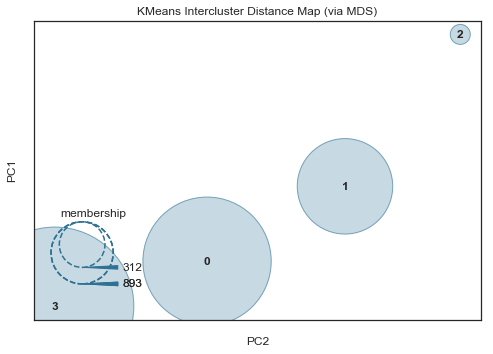

In [57]:
# Instantiate the clustering model and visualizer
model = kmeans
visualizer = InterclusterDistance(model)

visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<function matplotlib.pyplot.show(*args, **kw)>

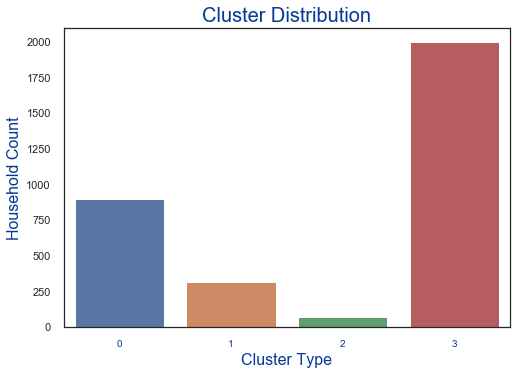

In [58]:
X = clusters_list

# plt.hist(X, bins = 10)
sns.set_context("talk", font_scale=0.8)
sns.set(style="white")
sns.countplot(X)
plt.ylabel('Household Count', fontsize = 16, color = '#073997')
plt.xlabel('Cluster Type', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Cluster Distribution', fontsize = 20, color = '#073997')
plt.savefig('Scaled Cluster 8', bbox_inches = 'tight')
plt.show

### Visualize KNN Performance

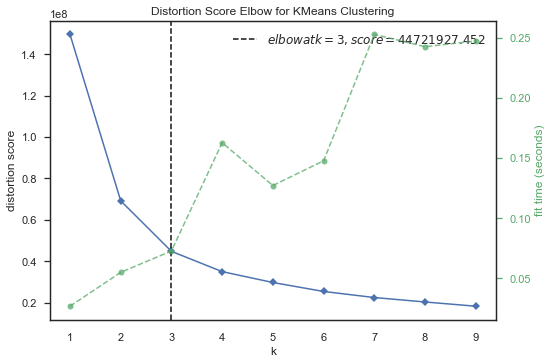

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c258320b8>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [169]:
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(model, cluster_df, k=(1,10))

## Silhouette Analysis

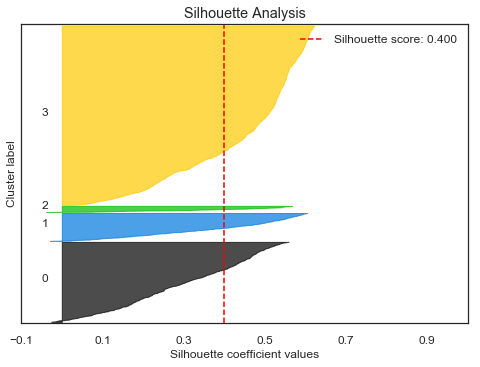

In [170]:
skplt.metrics.plot_silhouette(cluster_df, cluster_df['cls'])

In [61]:
C0 = cluster_df[cluster_df.cls == 0]
C1 = cluster_df[cluster_df.cls == 1]
C2 = cluster_df[cluster_df.cls == 2]
C3 = cluster_df[cluster_df.cls == 3]

In [62]:
C0.describe()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost,cls
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.00000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.0,893.000000,893.000000,893.000000,893.000000,893.000000,893.0
mean,0.993281,0.693169,95.488789,719.376431,70.944920,0.93617,2.120941,0.884658,0.001120,0.001120,...,0.275476,0.285554,0.256439,0.0,0.346025,0.001120,0.244121,0.278835,218.832385,0.0
std,0.081739,0.461437,54.197886,56.515695,14.131428,1.12919,1.069836,1.832419,0.033464,0.033464,...,0.447004,0.451931,0.436912,0.0,0.475968,0.033464,0.429806,0.448678,62.213803,0.0
min,0.000000,0.000000,10.000000,524.000000,22.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,121.500000,0.0
25%,1.000000,0.000000,55.000000,675.000000,62.750000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,164.000000,0.0
50%,1.000000,1.000000,95.000000,725.000000,72.000000,1.00000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,212.000000,0.0
75%,1.000000,1.000000,105.000000,766.666667,81.000000,1.00000,3.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,268.000000,0.0
max,1.000000,1.000000,250.000000,825.000000,99.000000,6.00000,6.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,353.280000,0.0


In [63]:
C1.describe()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost,cls
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.0,312.0,...,312.000000,312.000000,312.000000,312.0,312.000000,312.0,312.000000,312.000000,312.000000,312.0
mean,0.990385,0.932692,91.368102,709.299268,67.128788,1.153846,3.198718,1.631410,0.0,0.0,...,0.259615,0.250000,0.339744,0.0,0.387821,0.0,0.237179,0.326923,487.185064,1.0
std,0.097742,0.250957,49.355061,57.304812,14.804097,1.203713,1.471792,3.155464,0.0,0.0,...,0.439128,0.433708,0.474383,0.0,0.488036,0.0,0.426037,0.469842,103.297567,0.0
min,0.000000,0.000000,10.000000,538.888889,24.571429,0.000000,1.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,353.280000,1.0
25%,1.000000,1.000000,55.000000,670.000000,57.439904,0.000000,2.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,397.962500,1.0
50%,1.000000,1.000000,95.000000,705.902778,68.000000,1.000000,3.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,465.175000,1.0
75%,1.000000,1.000000,105.000000,757.142857,78.250000,2.000000,4.000000,1.000000,0.0,0.0,...,1.000000,0.250000,1.000000,0.0,1.000000,0.0,0.000000,1.000000,556.562500,1.0
max,1.000000,1.000000,250.000000,825.000000,97.727273,6.000000,8.000000,18.000000,0.0,0.0,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,747.000000,1.0


In [64]:
C2.describe()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost,cls
count,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0,...,70.000000,70.000000,70.000000,70.0,70.000000,70.0,70.000000,70.000000,70.000000,70.0
mean,0.985714,1.0,94.595249,707.402129,57.542034,1.357143,5.671429,3.185714,0.0,0.0,...,0.114286,0.185714,0.528571,0.0,0.357143,0.0,0.242857,0.371429,1008.699714,2.0
std,0.119523,0.0,59.775244,63.324886,16.268343,1.049993,2.613906,5.446160,0.0,0.0,...,0.320455,0.391684,0.502787,0.0,0.482617,0.0,0.431906,0.486675,263.235827,0.0
min,0.000000,1.0,10.555556,575.000000,25.000000,0.000000,1.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,755.850000,2.0
25%,1.000000,1.0,57.017544,666.832386,43.975000,1.000000,3.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,807.750000,2.0
50%,1.000000,1.0,85.267857,689.855072,59.669683,1.000000,5.500000,0.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,915.475000,2.0
75%,1.000000,1.0,105.000000,760.507246,68.812500,2.000000,7.000000,4.750000,0.0,0.0,...,0.000000,0.000000,1.000000,0.0,1.000000,0.0,0.000000,1.000000,1078.587500,2.0
max,1.000000,1.0,250.000000,825.000000,90.000000,4.000000,12.000000,24.000000,0.0,0.0,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1763.700000,2.0


In [65]:
C3.describe()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost,cls
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,...,1998.000000,1998.000000,1998.000000,1998.0,1998.000000,1998.0,1998.000000,1998.000000,1998.000000,1998.0
mean,0.984985,0.228228,85.670736,713.957535,74.971165,0.671672,0.770771,0.372372,0.001502,0.002503,...,0.269770,0.286787,0.292793,0.0,0.271271,0.0,0.353353,0.244244,42.244925,3.0
std,0.121643,0.419796,51.347163,56.081541,13.042112,0.941083,0.712227,0.761148,0.038730,0.049975,...,0.443951,0.452374,0.455158,0.0,0.444727,0.0,0.478131,0.429746,41.372819,0.0
min,0.000000,0.000000,10.000000,524.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,50.000000,675.000000,68.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.0
50%,1.000000,0.000000,95.000000,712.500000,75.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,34.000000,3.0
75%,1.000000,0.000000,105.000000,758.035714,84.625000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.000000,67.962500,3.0
max,1.000000,1.000000,250.000000,825.000000,100.000000,5.000000,4.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,138.500000,3.0


In [97]:
C3.columns

Index(['Mail Responder', 'Motorcycle Indicator', 'Income', 'Credit Ranges',
       'age', 'Number of Children', 'Num Vehicles Owned',
       'FSV Services Purchased', 'Home Owner_Probable Home Owner',
       'Home Owner_Probable Renter', 'Home Owner_Renter', 'Home Owner_nan',
       'Dwelling Type_Multy-Family Apt', 'Dwelling Type_PO Box',
       'Dwelling Type_Single-Family Home', 'Dwelling Type_nan',
       'SC Vehicle Manufacturer Name_AUDI', 'SC Vehicle Manufacturer Name_BMW',
       'SC Vehicle Manufacturer Name_BUICK',
       'SC Vehicle Manufacturer Name_CADILLAC',
       'SC Vehicle Manufacturer Name_CHEVROLET',
       'SC Vehicle Manufacturer Name_CHRYSLER',
       'SC Vehicle Manufacturer Name_DODGE',
       'SC Vehicle Manufacturer Name_FORD', 'SC Vehicle Manufacturer Name_GEO',
       'SC Vehicle Manufacturer Name_GMC',
       'SC Vehicle Manufacturer Name_HONDA',
       'SC Vehicle Manufacturer Name_HYUNDAI',
       'SC Vehicle Manufacturer Name_INFINITI',
       'SC Vehic

<function matplotlib.pyplot.show(*args, **kw)>

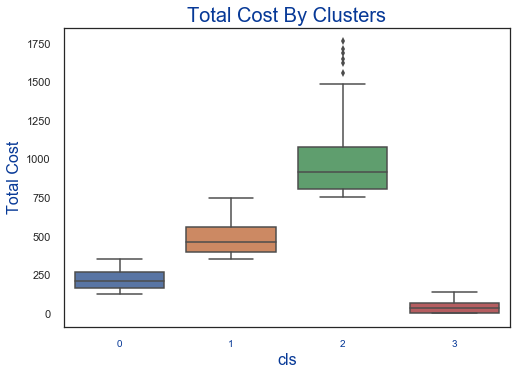

In [95]:
sns.set_context("talk", font_scale=0.8)
sns.set(style="white")
plt.ylabel('Total Cost Distribution', fontsize = 16, color = '#073997')
plt.xlabel('Cluster Number', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Total Cost By Clusters', fontsize = 20, color = '#073997')
sns.boxplot(x=cluster_df["cls"], y=cluster_df["Total Cost"])
plt.savefig('Clusters By Total Cost', bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

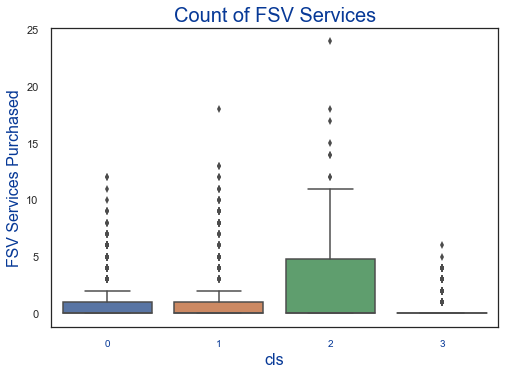

In [92]:
sns.set_context("talk", font_scale=0.8)
sns.set(style="white")
plt.ylabel('Count of FSV Services', fontsize = 16, color = '#073997')
plt.xlabel('Cluster Number', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Count of FSV Services', fontsize = 20, color = '#073997')
sns.boxplot( x=cluster_df["cls"], y=cluster_df["FSV Services Purchased"])
plt.savefig('Clusters By FSV Services', bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

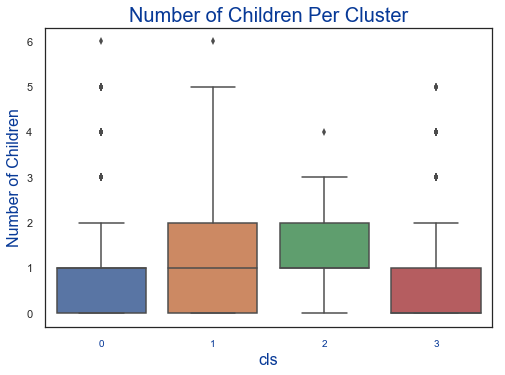

In [94]:
sns.set_context("talk", font_scale=0.8)
sns.set(style="white")
plt.ylabel('Total Cost Distribution', fontsize = 16, color = '#073997')
plt.xlabel('Cluster Number', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Number of Children Per Cluster', fontsize = 20, color = '#073997')
sns.boxplot(x=cluster_df["cls"], y=cluster_df["Number of Children"])
plt.savefig('Clusters By Num Children', bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

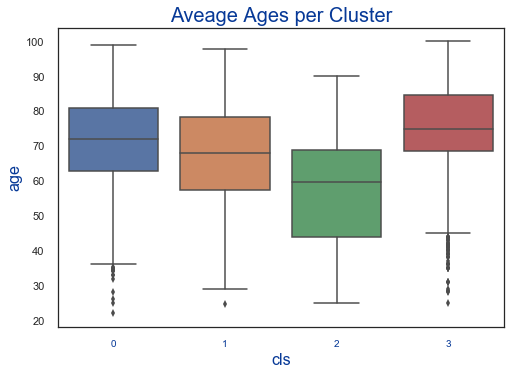

In [96]:
sns.set_context("talk", font_scale=0.8)
sns.set(style="white")
plt.ylabel('Total Cost Distribution', fontsize = 16, color = '#073997')
plt.xlabel('Cluster Number', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Aveage Ages per Cluster', fontsize = 20, color = '#073997')
sns.boxplot(x=cluster_df["cls"], y=cluster_df["age"])
plt.savefig('Clusters by Age', bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

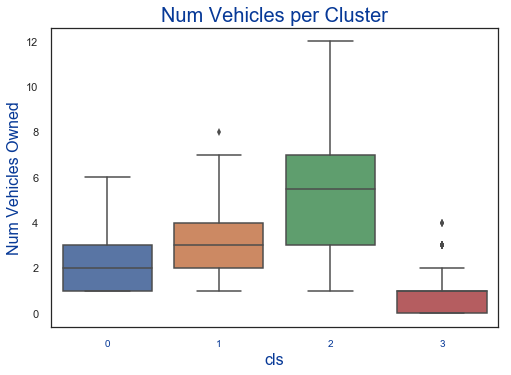

In [98]:
sns.set_context("talk", font_scale=0.8)
sns.set(style="white")
plt.ylabel('Total Cost Distribution', fontsize = 16, color = '#073997')
plt.xlabel('Cluster Number', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Num Vehicles per Cluster', fontsize = 20, color = '#073997')
sns.boxplot(x=cluster_df["cls"], y=cluster_df["Num Vehicles Owned"])
plt.savefig('Clusters by Num of Vehicles', bbox_inches = 'tight')
plt.show

In [137]:
def plot_cluster_mean(cluster_df, feature_name, sav_img = False):
    plt.ylabel('Avg Count', fontsize = 16, color = '#073997')
    plt.xlabel('Cluster', fontsize = 16, color = '#073997')
    plt.xticks(fontsize =10, color = '#073997')
    plt.title(feature_name, fontsize = 15, color = '#073997')
    cluster_df.groupby('cls')[feature_name].mean().plot(kind='bar')
    if sav_img:
        plt.savefig("Cluster" + feature_name, bbox_inches = 'tight')
        plt.show
    else:
        plt.show

In [165]:
cluster_df.columns

Index(['Mail Responder', 'Motorcycle Indicator', 'Income', 'Credit Ranges',
       'age', 'Number of Children', 'Num Vehicles Owned',
       'FSV Services Purchased', 'Home Owner_Probable Home Owner',
       'Home Owner_Probable Renter', 'Home Owner_Renter', 'Home Owner_nan',
       'Dwelling Type_Multy-Family Apt', 'Dwelling Type_PO Box',
       'Dwelling Type_Single-Family Home', 'Dwelling Type_nan',
       'SC Vehicle Manufacturer Name_AUDI', 'SC Vehicle Manufacturer Name_BMW',
       'SC Vehicle Manufacturer Name_BUICK',
       'SC Vehicle Manufacturer Name_CADILLAC',
       'SC Vehicle Manufacturer Name_CHEVROLET',
       'SC Vehicle Manufacturer Name_CHRYSLER',
       'SC Vehicle Manufacturer Name_DODGE',
       'SC Vehicle Manufacturer Name_FORD', 'SC Vehicle Manufacturer Name_GEO',
       'SC Vehicle Manufacturer Name_GMC',
       'SC Vehicle Manufacturer Name_HONDA',
       'SC Vehicle Manufacturer Name_HYUNDAI',
       'SC Vehicle Manufacturer Name_INFINITI',
       'SC Vehic

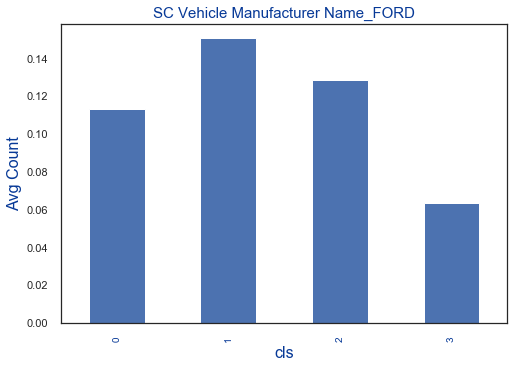

In [162]:
plot_cluster_mean(cluster_df, 'SC Vehicle Manufacturer Name_FORD')